# <h>Heart Disease analysis with classification</h>

**Authors:** Lola Sõukand, Robin Mürk

**Data:** https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/discussion

Aim is to build a binary classifier that predicts a person's risk of a heart attack and to analyse individual attributes to determine what lowers and what increases the risk of heart attack using regression analysis.

**Goal 1:** train a model to predict whether or not a patient is at high risk or at low risk of a heart attack.<br>
**Goal 2:** find factors,that lower the risk of heart attack <br>
**Goal 3:** find factors, that increase the risk of heart attack <br>

------------------------------------------  

## Initial data viewing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')
data=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data = data.astype(int)
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [2]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   Diabetes              253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

<Axes: >

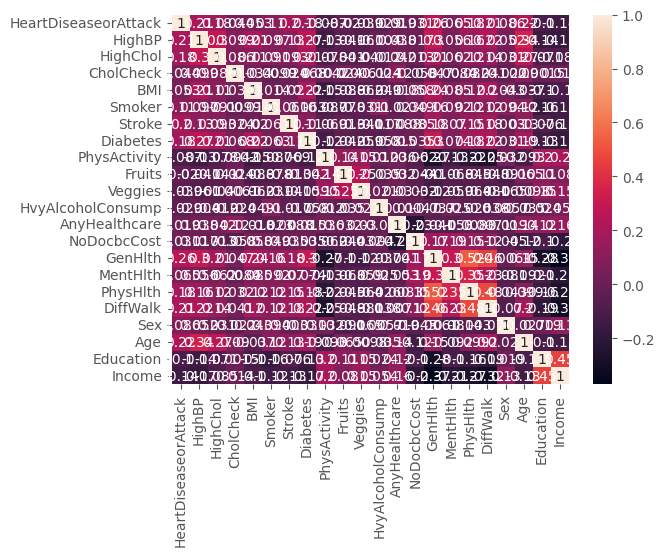

In [4]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

                  column      No     Yes
0   HeartDiseaseorAttack  229787   23893
1                 HighBP  144851  108829
2               HighChol  146089  107591
3              CholCheck    9470  244210
4                 Smoker  141257  112423
5                 Stroke  243388   10292
6           PhysActivity   61760  191920
7                 Fruits   92782  160898
8                Veggies   47839  205841
9      HvyAlcoholConsump  239424   14256
10         AnyHealthcare   12417  241263
11           NoDocbcCost  232326   21354
12              DiffWalk  211005   42675


<Axes: title={'center': 'i hate it'}, xlabel='column'>

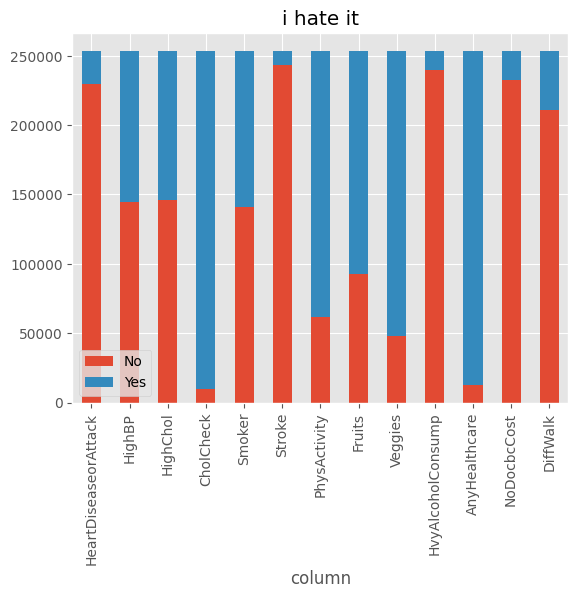

In [5]:
#Binary column graph
counts_df = pd.DataFrame(columns=['column', 'No', 'Yes'])

for col in ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 
       'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']:
    counts1 = data[col].value_counts()[1.0]
    counts0 = data[col].value_counts()[0.0]
    
    counts_df = pd.concat([counts_df, pd.DataFrame([{'column': col, 'No': counts0, 'Yes': counts1}])], ignore_index=True)

print(counts_df)
counts_df.plot.bar(x='column', stacked=True, title='i hate it')

<Axes: xlabel='BMI'>

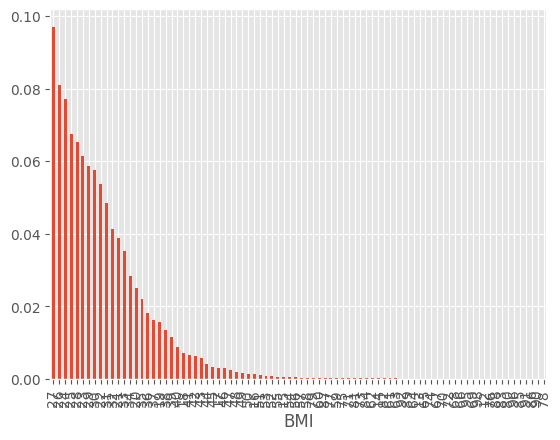

In [6]:
data['BMI'].value_counts(normalize=True).plot(kind="bar")

<Axes: xlabel='Age'>

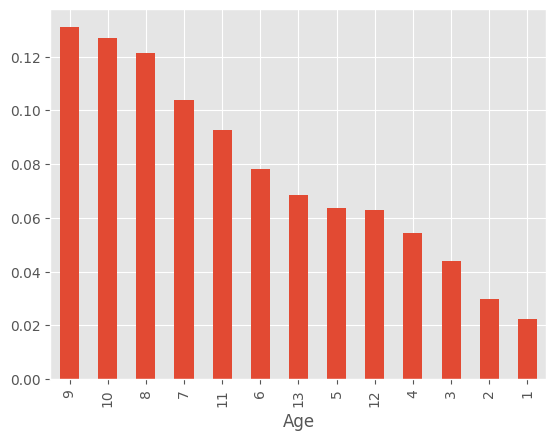

In [7]:
data['Age'].value_counts(normalize=True).plot(kind="bar")

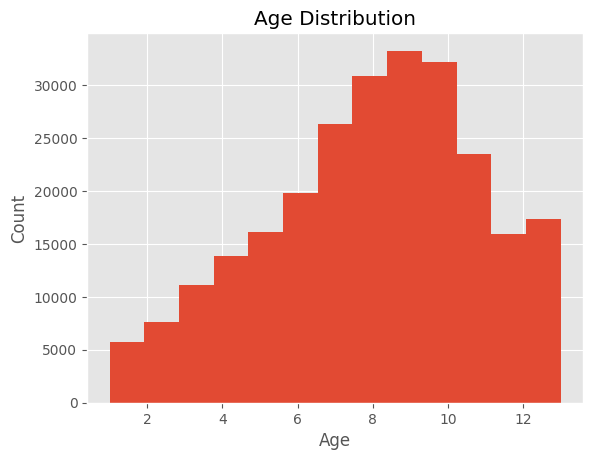

In [8]:
plt.hist(data['Age'], bins=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<Axes: >

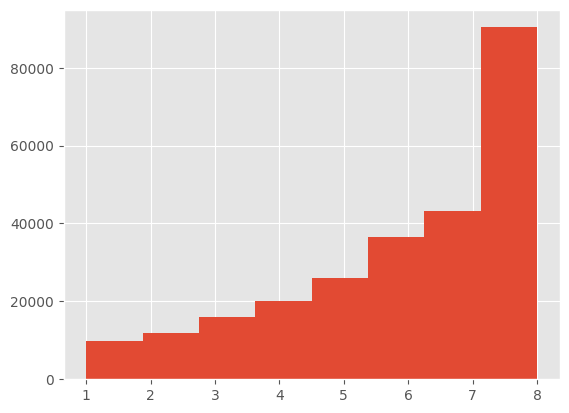

In [9]:
data['Income'].hist(bins=8)

----------------------------------------
# Correlestions

<Axes: >

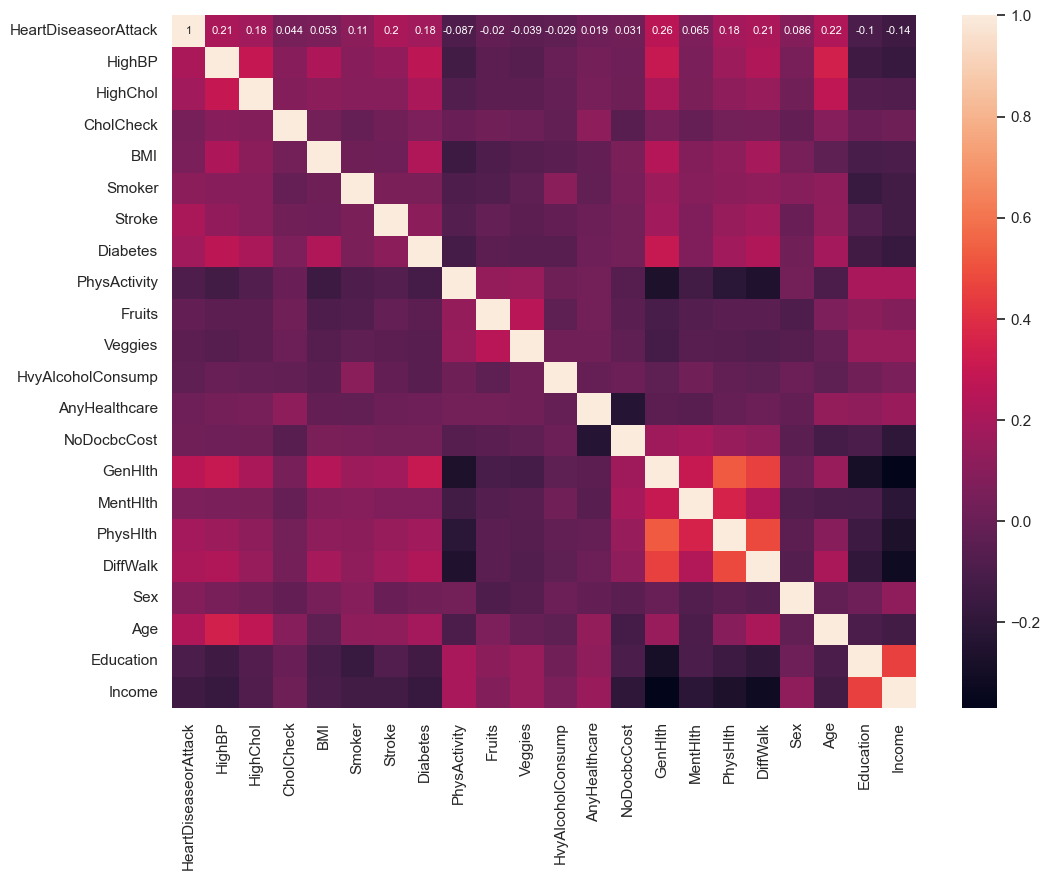

In [10]:
corr_matrix = data.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr_matrix, annot=True,annot_kws={"size": 8})

In [11]:
from scipy.stats import pointbiserialr

corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i == j:
            corr_matrix[i][j] = 1
        else:
            corr, p_value = pointbiserialr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i][j] = corr
corr_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
print(corr_df)

                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   

---------------------
### P-value


In [12]:
for column in data.columns[1:]:
    corr,p_value = pearsonr(data[column], data['HeartDiseaseorAttack'])
    print(f'The correlation between heart disease and {column}  is {corr:.2f} with a p-value of {p_value:.2e}')

The correlation between heart disease and HighBP  is 0.21 with a p-value of 0.00e+00
The correlation between heart disease and HighChol  is 0.18 with a p-value of 0.00e+00
The correlation between heart disease and CholCheck  is 0.04 with a p-value of 6.35e-110
The correlation between heart disease and BMI  is 0.05 with a p-value of 1.21e-156
The correlation between heart disease and Smoker  is 0.11 with a p-value of 0.00e+00
The correlation between heart disease and Stroke  is 0.20 with a p-value of 0.00e+00
The correlation between heart disease and Diabetes  is 0.18 with a p-value of 0.00e+00
The correlation between heart disease and PhysActivity  is -0.09 with a p-value of 0.00e+00
The correlation between heart disease and Fruits  is -0.02 with a p-value of 2.09e-23
The correlation between heart disease and Veggies  is -0.04 with a p-value of 1.08e-86
The correlation between heart disease and HvyAlcoholConsump  is -0.03 with a p-value of 2.63e-48
The correlation between heart disease

In [13]:
from scipy.stats import pointbiserialr

for column in data.columns[1:]:
    if data[column].dtype == int and set(data[column].unique()) == {0, 1}:
        corr, p_value = pointbiserialr(data[column], data['HeartDiseaseorAttack'])
        print(f'The point-biserial correlation between heart disease and {column} is {corr:.2f} with a p-value of {p_value:.2e}')
    else:
        print(f'Skipping {column} as it does not contain binary numeric data (0 or 1).')

The point-biserial correlation between heart disease and HighBP is 0.21 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and HighChol is 0.18 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and CholCheck is 0.04 with a p-value of 6.35e-110
Skipping BMI as it does not contain binary numeric data (0 or 1).


The point-biserial correlation between heart disease and Smoker is 0.11 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and Stroke is 0.20 with a p-value of 0.00e+00
Skipping Diabetes as it does not contain binary numeric data (0 or 1).
The point-biserial correlation between heart disease and PhysActivity is -0.09 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and Fruits is -0.02 with a p-value of 2.09e-23
The point-biserial correlation between heart disease and Veggies is -0.04 with a p-value of 1.08e-86
The point-biserial correlation between heart disease and HvyAlcoholConsump is -0.03 with a p-value of 2.63e-48
The point-biserial correlation between heart disease and AnyHealthcare is 0.02 with a p-value of 3.85e-21
The point-biserial correlation between heart disease and NoDocbcCost is 0.03 with a p-value of 5.56e-55
Skipping GenHlth as it does not contain binary numeric data (0 or 1).
Skipping MentHlth as it does not 

In [14]:
from scipy.stats import spearmanr
for column in corr_df.columns:
    corr, p_value = spearmanr(data[column], data['HeartDiseaseorAttack'])
    print(f"The correlation between variable1 and {column} is {corr:.2f} with a p-value of {p_value:.2e}")

The correlation between variable1 and HeartDiseaseorAttack is 1.00 with a p-value of 0.00e+00
The correlation between variable1 and HighBP is 0.21 with a p-value of 0.00e+00
The correlation between variable1 and HighChol is 0.18 with a p-value of 0.00e+00
The correlation between variable1 and CholCheck is 0.04 with a p-value of 6.35e-110
The correlation between variable1 and BMI is 0.06 with a p-value of 5.12e-226
The correlation between variable1 and Smoker is 0.11 with a p-value of 0.00e+00
The correlation between variable1 and Stroke is 0.20 with a p-value of 0.00e+00
The correlation between variable1 and Diabetes is 0.18 with a p-value of 0.00e+00
The correlation between variable1 and PhysActivity is -0.09 with a p-value of 0.00e+00
The correlation between variable1 and Fruits is -0.02 with a p-value of 2.09e-23
The correlation between variable1 and Veggies is -0.04 with a p-value of 1.08e-86
The correlation between variable1 and HvyAlcoholConsump is -0.03 with a p-value of 2.63e-4

In [15]:
from scipy.stats import chi2_contingency

for column in data.columns:
    contingency_table = pd.crosstab(data[column], data['HeartDiseaseorAttack'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"The chi-squared statistic is {chi2:.2f} with a p-value of {p_value:.2e}")

The chi-squared statistic is 253668.28 with a p-value of 0.00e+00
The chi-squared statistic is 11117.88 with a p-value of 0.00e+00
The chi-squared statistic is 8288.02 with a p-value of 0.00e+00
The chi-squared statistic is 494.93 with a p-value of 1.20e-109
The chi-squared statistic is 1251.19 with a p-value of 7.40e-208
The chi-squared statistic is 3321.61 with a p-value of 0.00e+00
The chi-squared statistic is 10450.58 with a p-value of 0.00e+00
The chi-squared statistic is 8244.89 with a p-value of 0.00e+00
The chi-squared statistic is 1932.63 with a p-value of 0.00e+00
The chi-squared statistic is 99.22 with a p-value of 2.27e-23
The chi-squared statistic is 388.82 with a p-value of 1.49e-86
The chi-squared statistic is 212.77 with a p-value of 3.41e-48
The chi-squared statistic is 88.74 with a p-value of 4.51e-21
The chi-squared statistic is 243.40 with a p-value of 7.14e-55
The chi-squared statistic is 19008.16 with a p-value of 0.00e+00
The chi-squared statistic is 1299.47 with

----------------------------------
# Data visual

In [16]:
# making copy of data and deleting the data rows if the value count in the column is lower than 1%
data_copy = data.copy()

for column in[ 'BMI', 'MentHlth','PhysHlth', 'Education']:
    threshold_count = 0.01 * data_copy[column].count()
    data_copy = data_copy[data_copy.groupby(column)[column].transform('count') >= threshold_count]


igaks juhuks
def plot_figure(pivot_table, title, xpos,x,y):
    
    if len(pivot_table.index) < 30:
        ax = pivot_table.plot.barh(stacked = True, figsize = (x,y),color = ['#3c91e6','#d33f49'])
        labels = []
        for j in pivot_table.columns:
            for i in pivot_table.index:
                if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                    label = ""
                else:                                                                                                                       
                    label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
                labels.append(label)

        patches = ax.patches
        for label, rect in zip(labels, patches):
            width = rect.get_width()
            if width > 0:
                x = rect.get_x()
                y = rect.get_y()
                height = rect.get_height()

                if width>xpos: 
                    ax.text(x + width/2, y + height/2., label, ha='center', va='center', fontsize=8, fontweight='bold')
                else:
                    ax.text(x + xpos, y + height/2., label, ha='center', va='center', fontsize=8, fontweight='bold')
    else:
        ax = pivot_table.plot.barh(stacked = True, figsize = (x,y), color = ['#3c91e6','#d33f49'])

    legend = plt.legend(['No', 'Yes'], loc='upper right', title="Has this person had a heart attack or disease?")
    
    ax.set_xlabel('Count')
    if len(pivot_table.index) == 2:
        ax.set_yticklabels(['No', 'Yes']) 
    else:
        ax.set_yticklabels(pivot_table.index) 
    
    plt.title(title)
    plt.show()

In [48]:
# For graph
def plot_figure(pivot_table, title, xpos,x,y):
    
    if len(pivot_table.index) < 30:
        ax = pivot_table.plot.barh(stacked = True, figsize = (x,y),color = ['#3c91e6','#d33f49'])
        labels = []
        for j in pivot_table.columns:
            for i in pivot_table.index:
                if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                    label = ""
                else:                                                                                                                       
                    label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
                labels.append(label)

        min_font_size = 11  # Set a minimum font size for better readability
        percentage_threshold = 5  # Display percentage labels only for bars above this width threshold

        patches = ax.patches
        for label, rect in zip(labels, patches):
            width = rect.get_width()
            if width > 0:
                x = rect.get_x()
                y = rect.get_y()
                height = rect.get_height()

                # Calculate a dynamic font size based on the width of the bar
                font_size = max(min_font_size, min(8, 8 * width / xpos))

                # Display percentage labels only for bars above the threshold
                if width > xpos and width / ax.get_xlim()[1] * 100 > percentage_threshold:
                    ax.text(x + width/2, y + height/2., label, ha='center', va='center', fontsize=font_size)
                elif width > xpos:
                    ax.text(x + width/2, y + height/2., "", ha='center', va='center')  # Empty label for smaller bars
                else:
                    ax.text(x + xpos, y + height/2., label, ha='center', va='center', fontsize=font_size)
    else:
        ax = pivot_table.plot.barh(stacked = True, figsize = (x,y), color = ['#3c91e6','#d33f49'])

    legend = plt.legend(['No', 'Yes'], loc='upper right', title="Has this person had a heart attack or disease?")
    
    ax.set_xlabel('Count')
    if len(pivot_table.index) == 2:
        ax.set_yticklabels(['No', 'Yes']) 
    else:
        ax.set_yticklabels(pivot_table.index) 
    
    plt.title(title)
    plt.show()

#katsetus
import matplotlib.pyplot as plt

def plot_figure(pivot_table, title, x, y):
    ax = pivot_table.plot.bar(stacked=True, figsize=(x, y), rot=0)
    
    plt.title(title)
    plt.show()
'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke','Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',  'GenHlth', 'MentHlth',
'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Age'

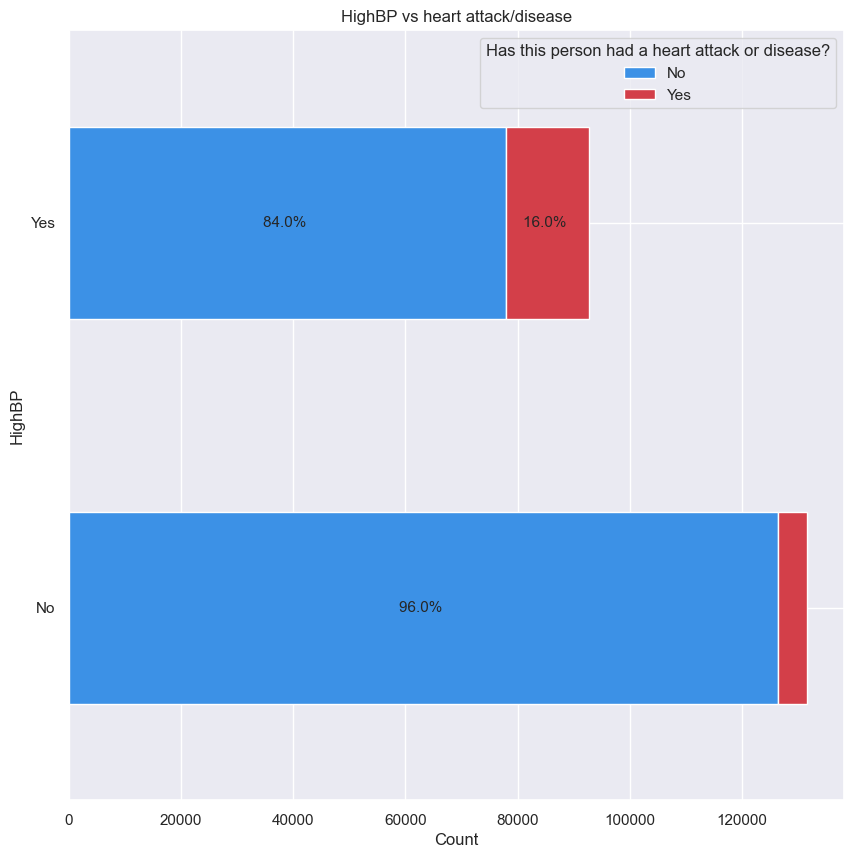

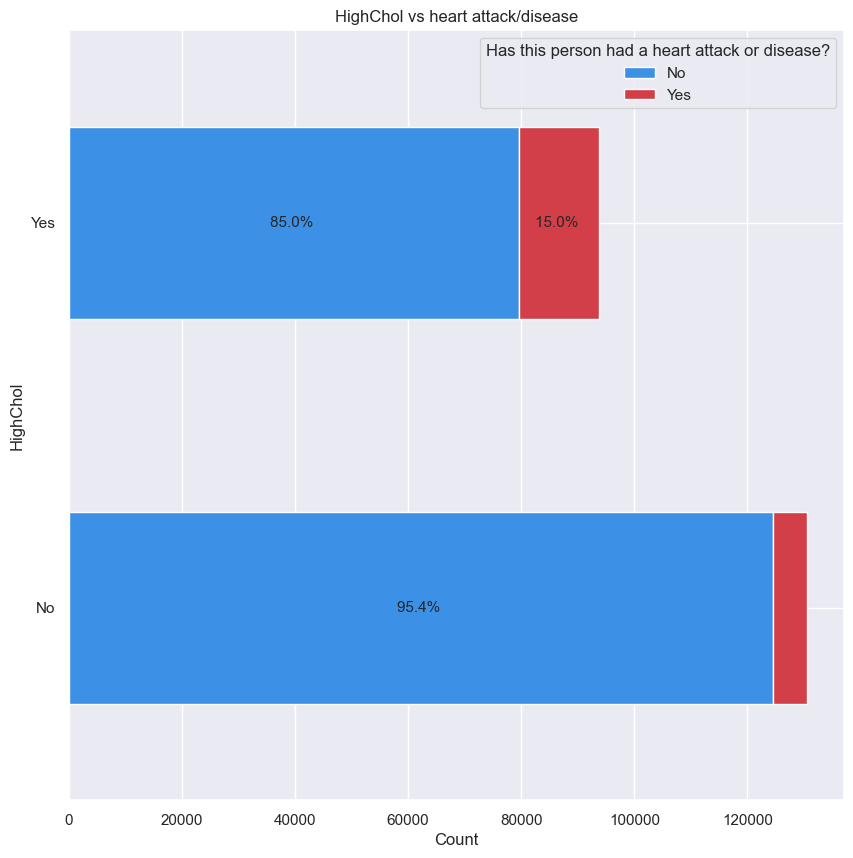

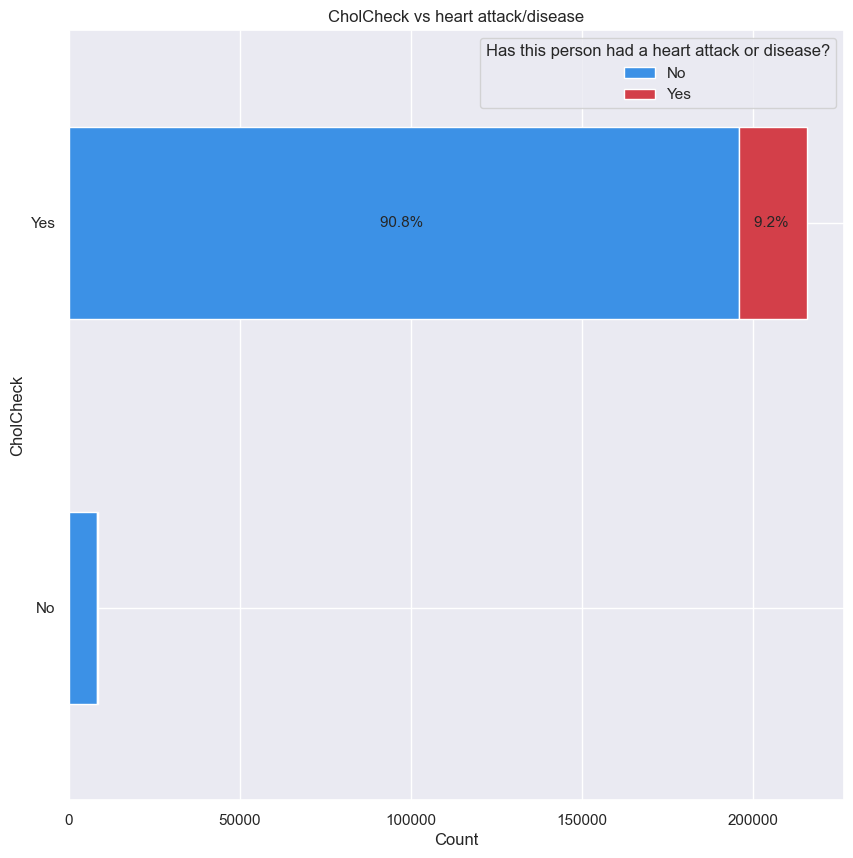

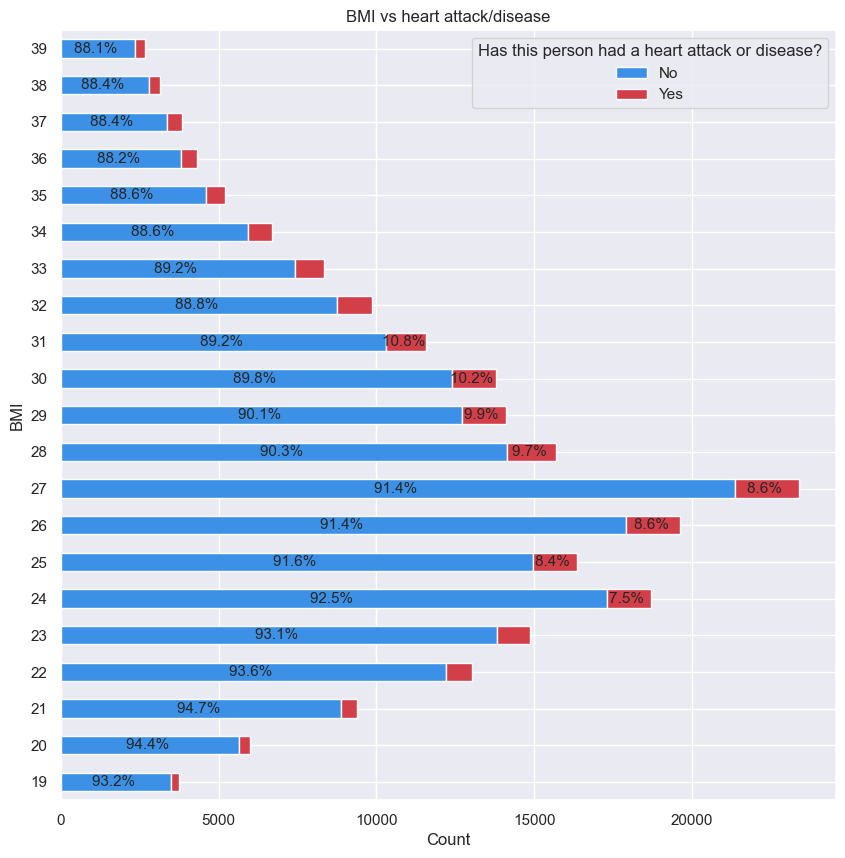

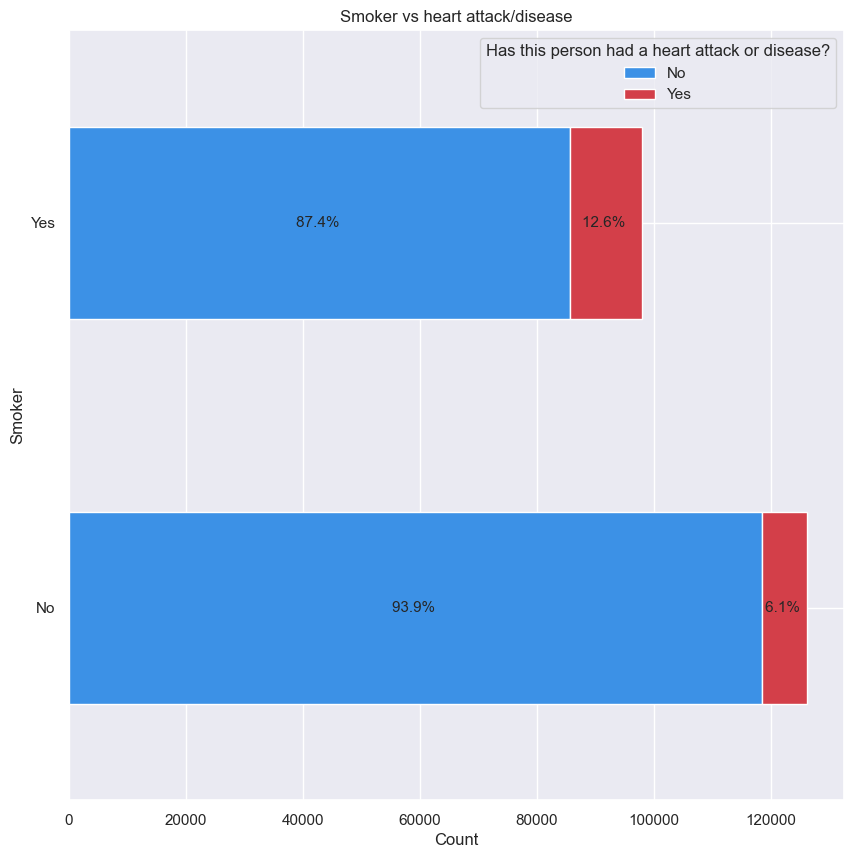

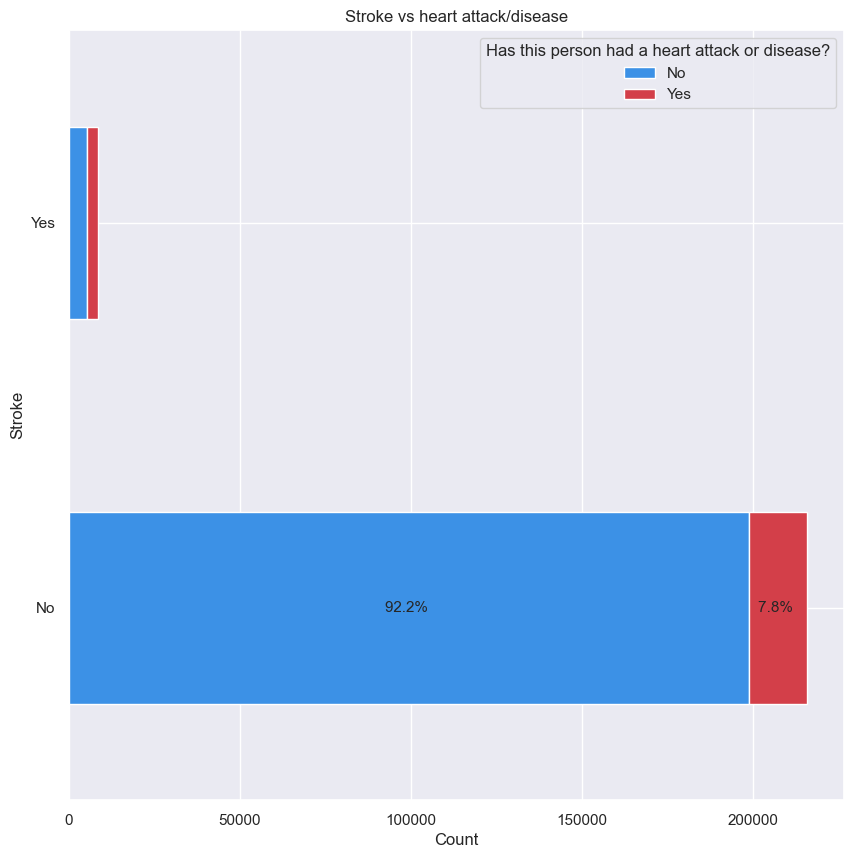

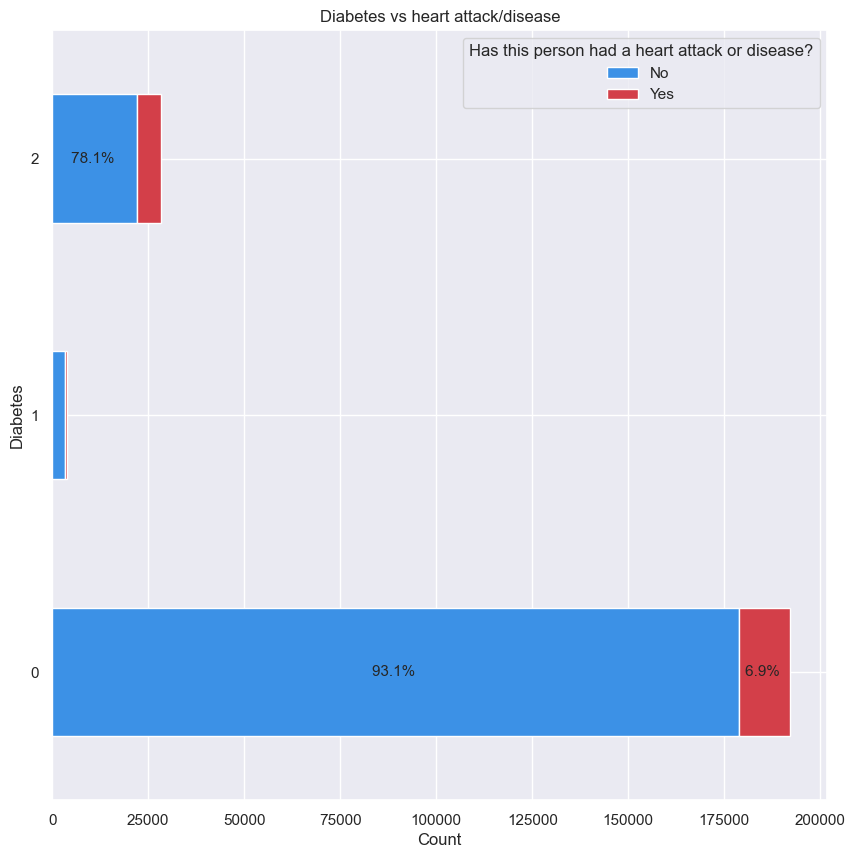

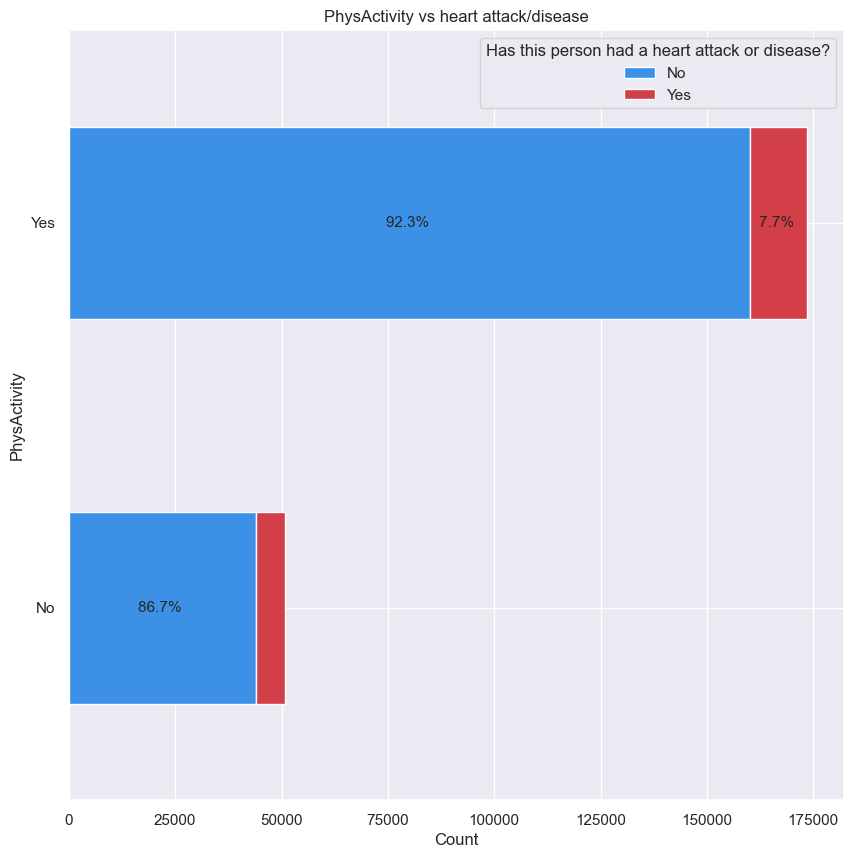

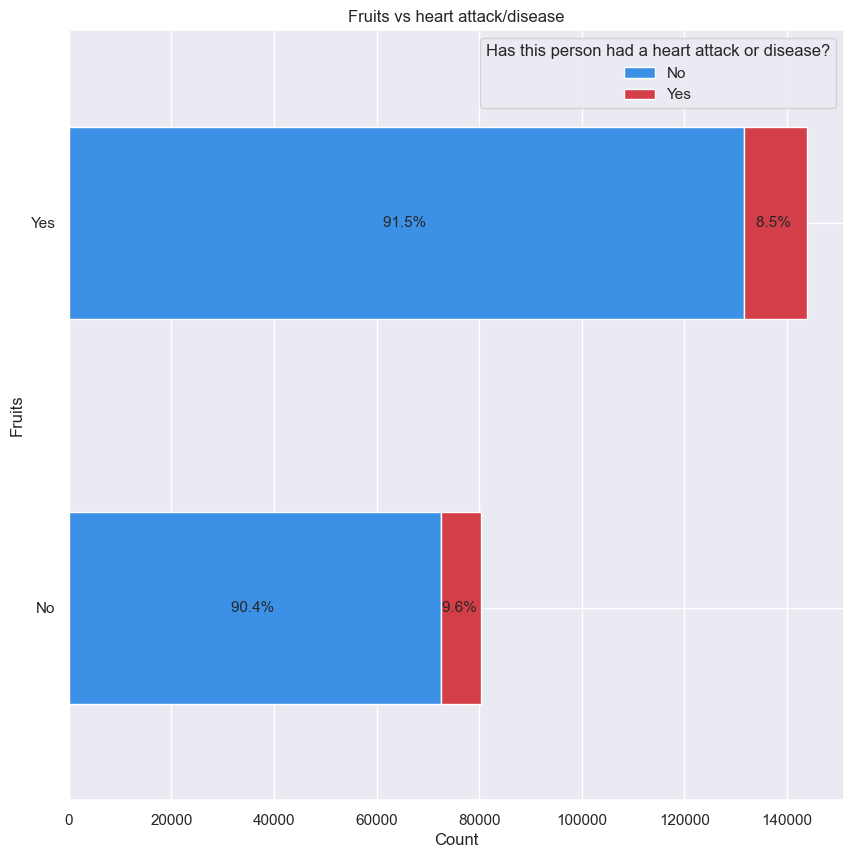

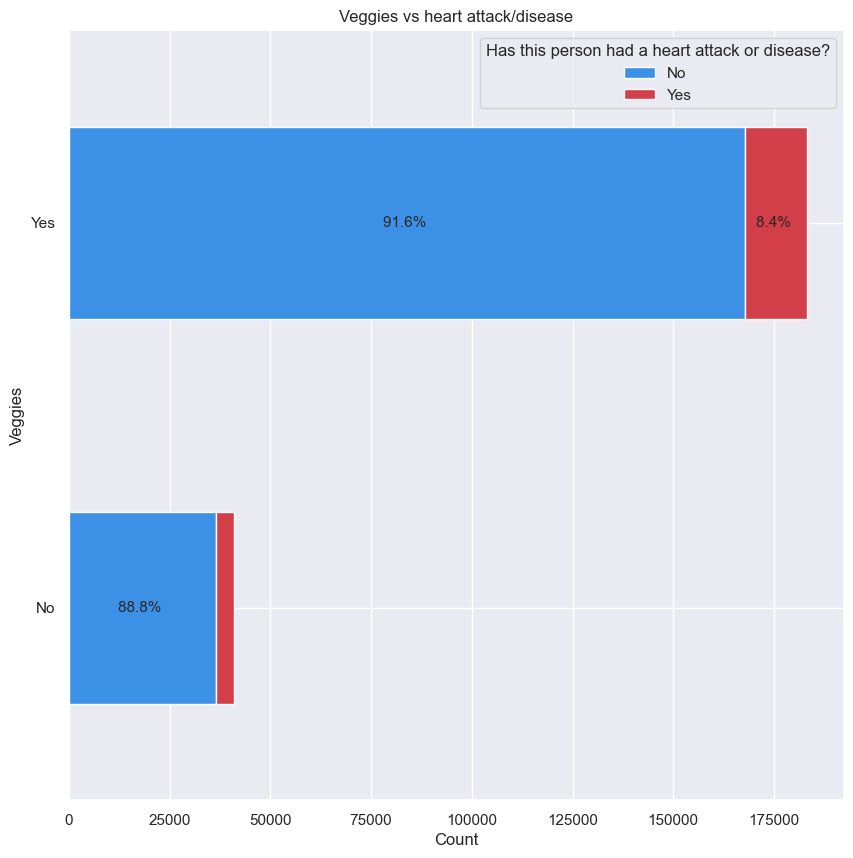

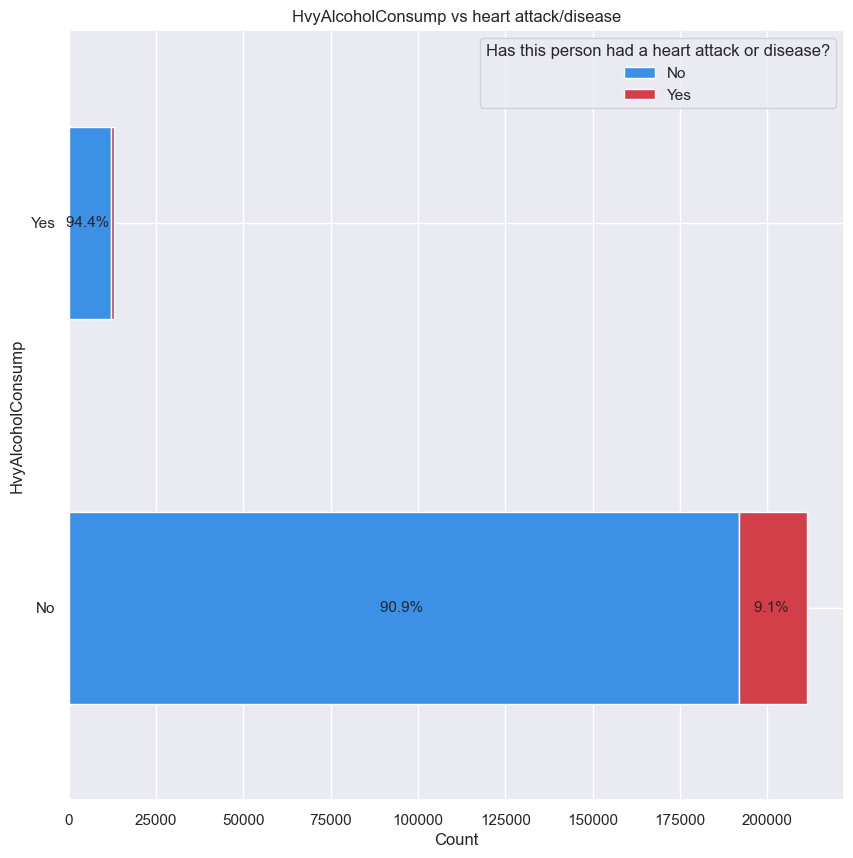

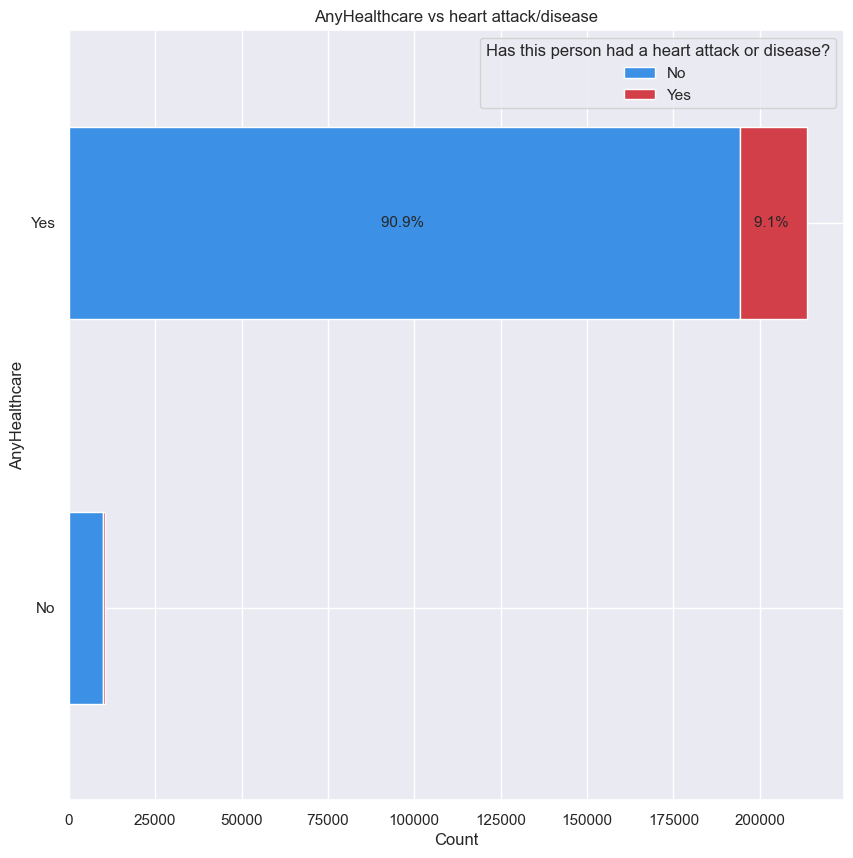

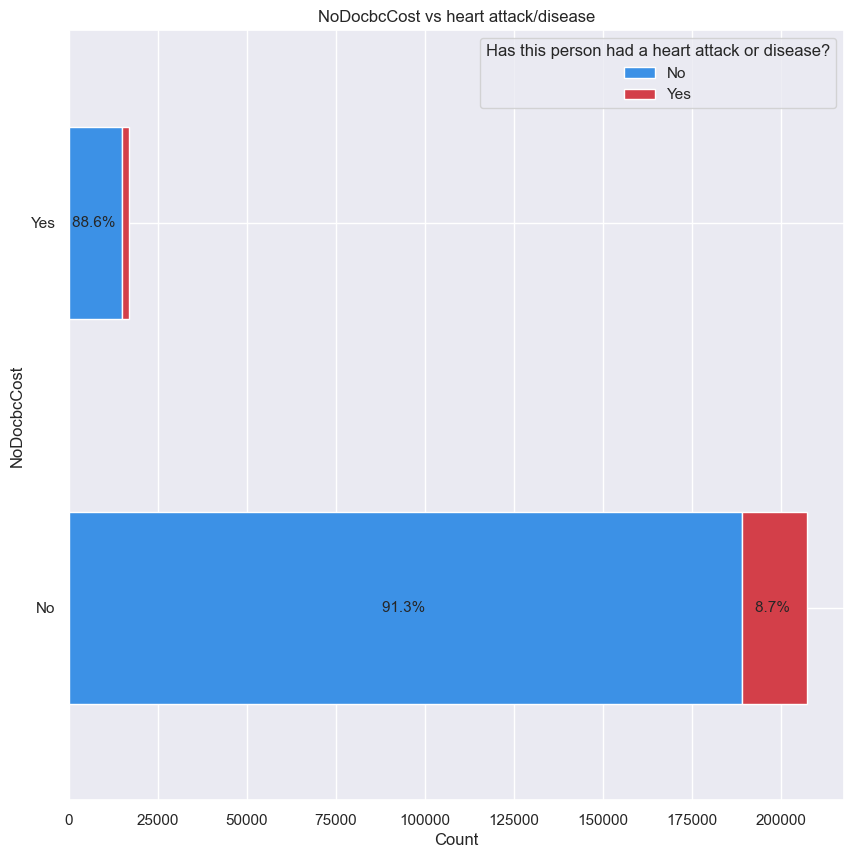

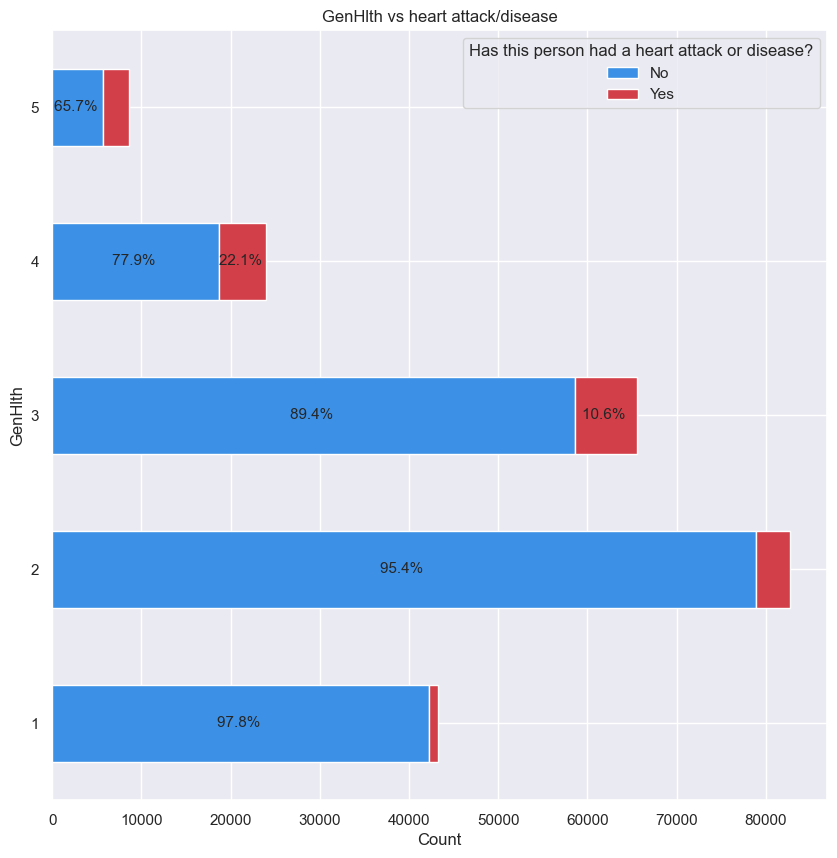

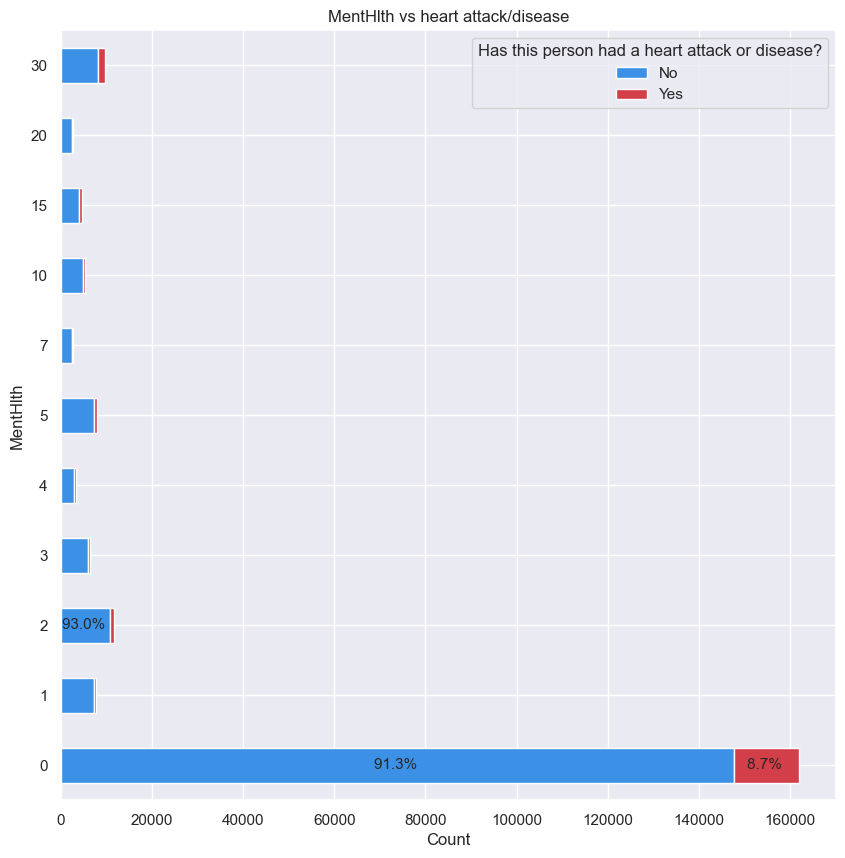

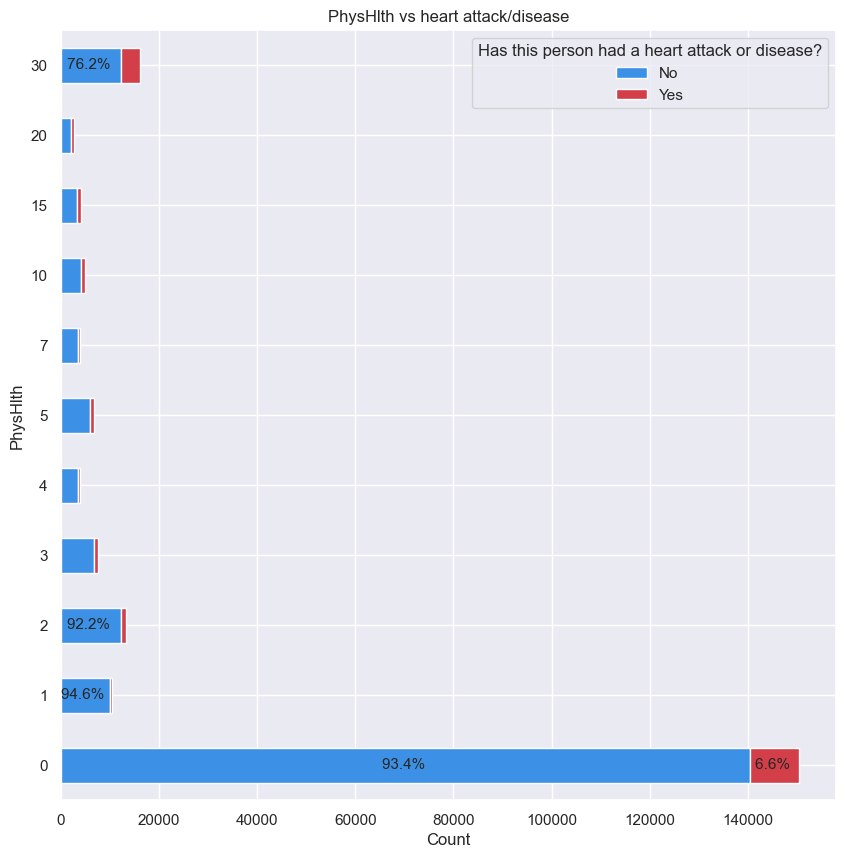

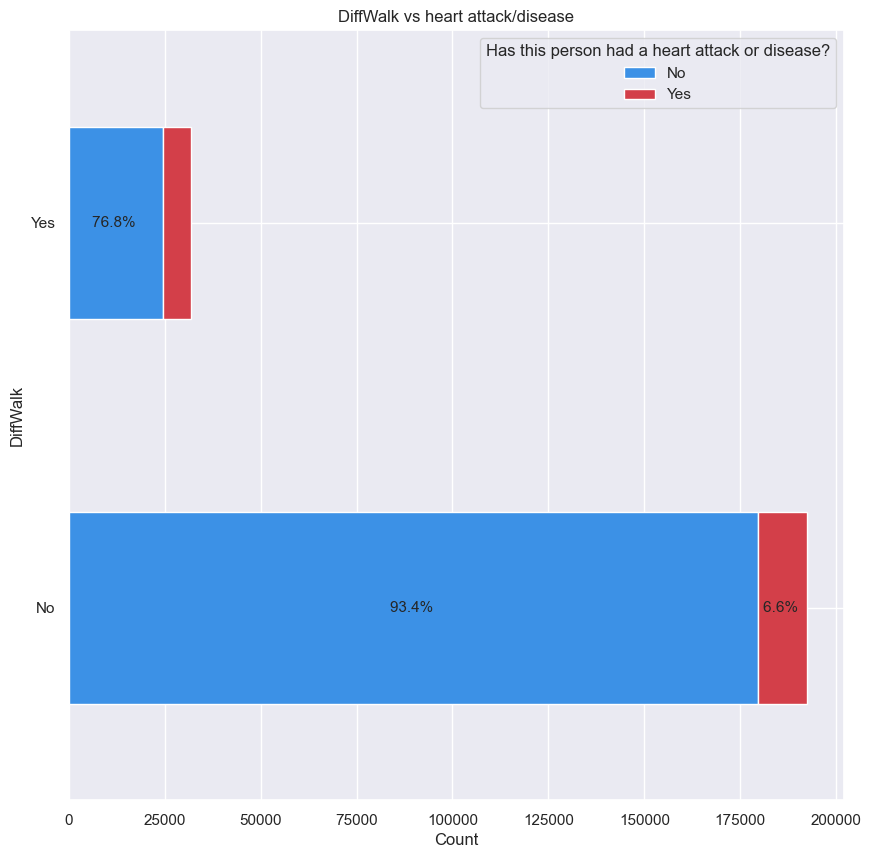

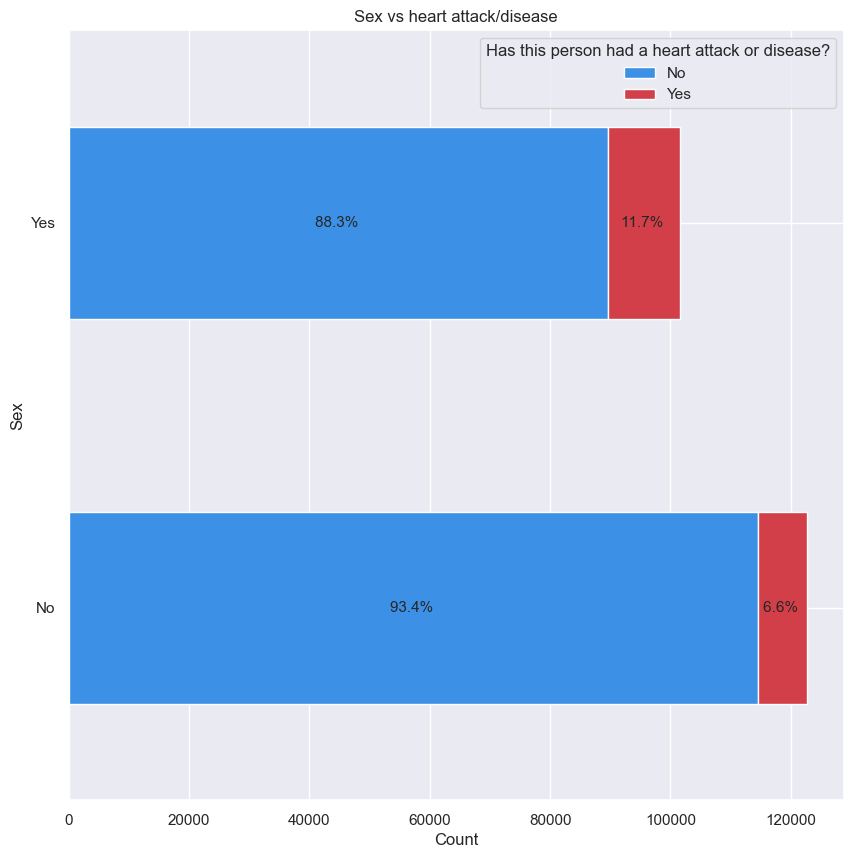

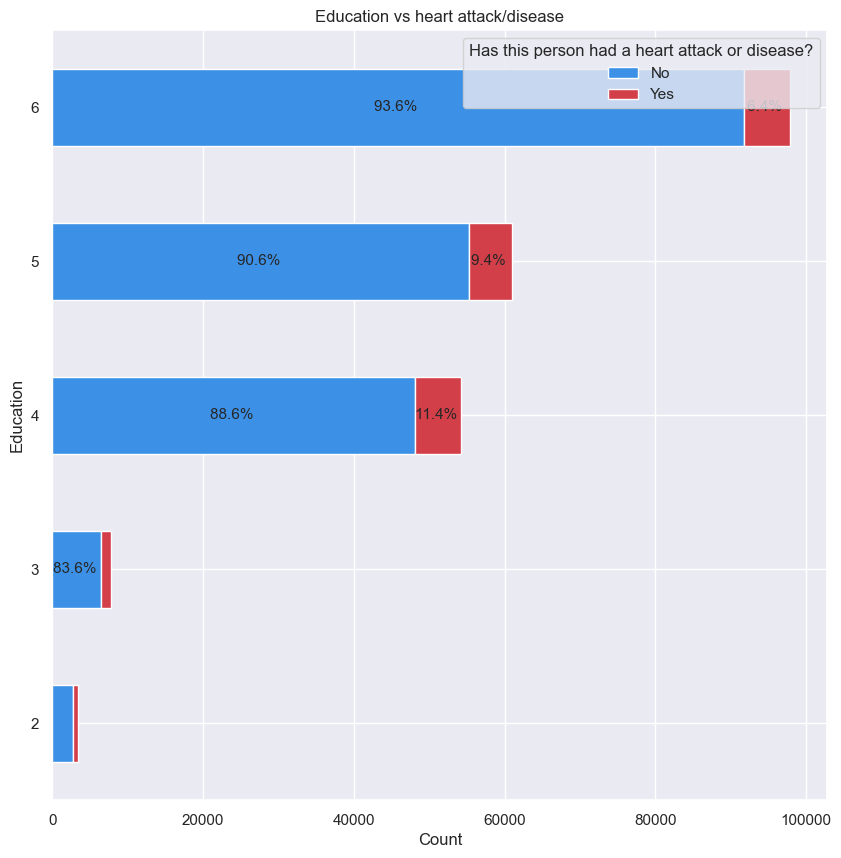

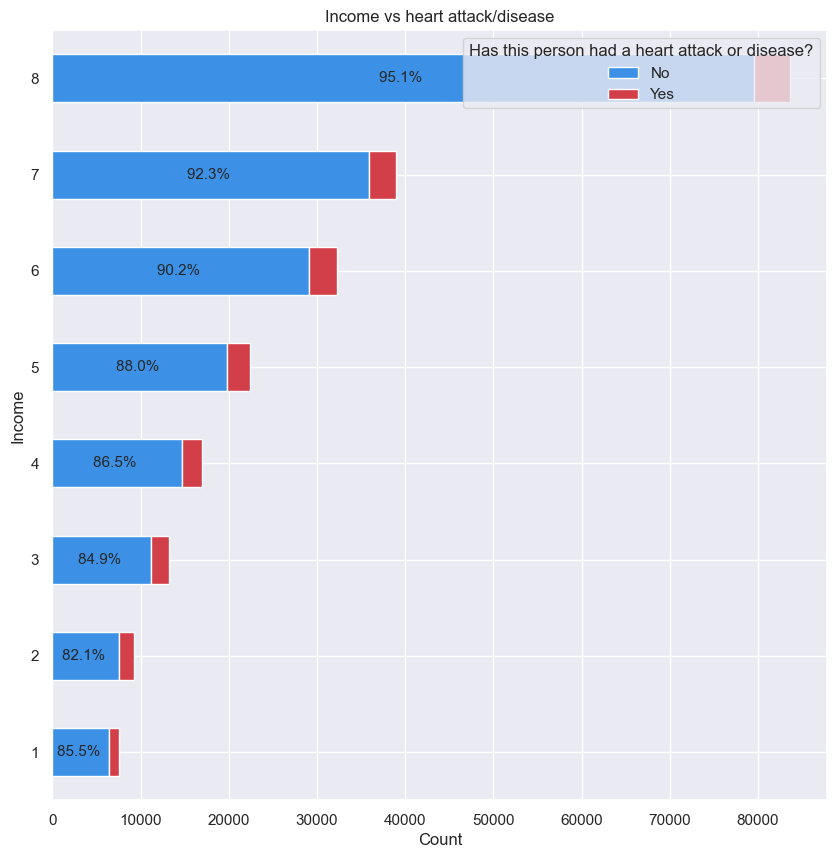

In [49]:
for column in['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke','Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',  'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']:
    plot = data_copy.pivot_table(index = [column], columns = 'HeartDiseaseorAttack', values = 'Age', aggfunc = 'count')
    plot_figure(plot,column+ " vs heart attack/disease", 10,10,10)


-----------------------------------------------
# Modelling

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc as AUC, accuracy_score,classification_report
from numpy import random
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Remove random rows so that positve labels count == negative labels count
amount_to_remove = data.shape[0] - 2*data[data['HeartDiseaseorAttack']==1.0].shape[0]
elements_to_remove = data[data['HeartDiseaseorAttack']==0.0].index
rows_for_droping = np.random.choice(elements_to_remove, size=amount_to_remove,replace=False)
data.drop(rows_for_droping,inplace=True)


#controll for checking that exist the same ammount
print(data.shape[0] == data[data['HeartDiseaseorAttack']==0.0].shape[0] + data[data['HeartDiseaseorAttack']==1.0].shape[0])
print(data.shape)
print(f"with heartattack with 0: {data[data['HeartDiseaseorAttack']==0.0].shape[0]}")
print(f"with heartattack with 1: {data[data['HeartDiseaseorAttack']==1.0].shape[0]}")



#creating the feature and label data
features = data.drop(columns='HeartDiseaseorAttack',axis=1)
labels = data['HeartDiseaseorAttack']

correlation_values = data.corr()['HeartDiseaseorAttack'].abs().sort_values(ascending=False)
print(correlation_values)

#Droping following columns because of low correlation
features.drop(columns='NoDocbcCost',axis=1,inplace=True)
features.drop(columns='Fruits',axis=1,inplace=True)
features.drop(columns='Veggies',axis=1,inplace=True)
features.drop(columns='AnyHealthcare',axis=1,inplace=True)
features.drop(columns='HvyAlcoholConsump',axis=1,inplace=True)
features.drop(columns='CholCheck',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.25, random_state=4)

#for hyperparameter tuning and CV
X_training, X_validation, y_training, y_validation = train_test_split(X_train,y_train, test_size=0.25, random_state=4)

#Use standard scaling on training,validation and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  #fits and transforms the data
X_training = scaler.transform(X_training)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

#pca = PCA(n_components=5)
#X_train = pca.fit_transform(X_train) 
#X_training = pca.transform(X_training)
#X_validation = pca.transform(X_validation)
#X_test = pca.transform(X_test)


True
(47786, 22)
with heartattack with 0: 23893
with heartattack with 1: 23893
HeartDiseaseorAttack    1.000000
GenHlth                 0.407133
Age                     0.400060
HighBP                  0.356905
HighChol                0.306196
DiffWalk                0.301099
PhysHlth                0.259855
Diabetes                0.259611
Income                  0.230804
Stroke                  0.229215
Smoker                  0.190989
Education               0.165297
Sex                     0.146445
PhysActivity            0.142967
MentHlth                0.104169
BMI                     0.088701
CholCheck               0.086824
Veggies                 0.068163
HvyAlcoholConsump       0.054732
NoDocbcCost             0.048539
Fruits                  0.034037
AnyHealthcare           0.033257
Name: HeartDiseaseorAttack, dtype: float64


In [40]:
def objective(trial):

    parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }
    
    classifier_obj = RandomForestClassifier(**parameters)
    classifier_obj.fit(X_training,y_training)
    prediction = classifier_obj.predict(X_validation)

    return accuracy_score(y_validation,prediction)

    score = cross_val_score(classifier_obj, X_train,y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


studyRandom = optuna.create_study(direction="maximize")
studyRandom.optimize(objective, n_trials=100)
print(studyRandom.best_trial)

[I 2023-12-08 20:13:58,257] A new study created in memory with name: no-name-5a35a7f0-43fe-44b5-a608-9d66867b8ebb
[I 2023-12-08 20:14:07,000] Trial 0 finished with value: 0.76796875 and parameters: {'n_estimators': 419, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.76796875.
[I 2023-12-08 20:14:09,814] Trial 1 finished with value: 0.7643973214285714 and parameters: {'n_estimators': 233, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.76796875.
[I 2023-12-08 20:14:13,941] Trial 2 finished with value: 0.7700892857142857 and parameters: {'n_estimators': 160, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.7700892857142857.
[I 2023-12-08 20:14:22,528] Trial 3 finished with value: 0.7680803571428572 and parameters: {'n_estimators': 347, 'max_depth': 14, 'min_samples_split': 4, 'm

FrozenTrial(number=38, state=TrialState.COMPLETE, values=[0.7712053571428571], datetime_start=datetime.datetime(2023, 12, 8, 20, 16, 57, 566762), datetime_complete=datetime.datetime(2023, 12, 8, 20, 17, 1, 332728), params={'n_estimators': 177, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'log2'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2'))}, trial_id=38, value=None)


In [41]:
def objective2(trial):

    parameters ={
    'n_neighbors': trial.suggest_int('n_neighbors',2,25,1),
    'weights' : trial.suggest_categorical('weights',['uniform','distance'])
}
    
    classifier_obj = KNeighborsClassifier(**parameters)
    classifier_obj.fit(X_training,y_training)
    prediction = classifier_obj.predict(X_validation)

    return accuracy_score(y_validation,prediction)

    score = cross_val_score(classifier_obj, X_train,y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


studyKNN = optuna.create_study(direction="maximize")
studyKNN.optimize(objective2, n_trials=100)
print(studyKNN.best_trial)

[I 2023-12-08 20:21:57,228] A new study created in memory with name: no-name-d5939bdb-0868-4829-8a67-6358b29d20af
[I 2023-12-08 20:22:03,163] Trial 0 finished with value: 0.7514508928571428 and parameters: {'n_neighbors': 24, 'weights': 'distance'}. Best is trial 0 with value: 0.7514508928571428.
[I 2023-12-08 20:22:08,153] Trial 1 finished with value: 0.7428571428571429 and parameters: {'n_neighbors': 10, 'weights': 'uniform'}. Best is trial 0 with value: 0.7514508928571428.
[I 2023-12-08 20:22:10,986] Trial 2 finished with value: 0.6850446428571428 and parameters: {'n_neighbors': 2, 'weights': 'distance'}. Best is trial 0 with value: 0.7514508928571428.
[I 2023-12-08 20:22:17,369] Trial 3 finished with value: 0.7561383928571429 and parameters: {'n_neighbors': 24, 'weights': 'uniform'}. Best is trial 3 with value: 0.7561383928571429.
[I 2023-12-08 20:22:24,321] Trial 4 finished with value: 0.7574776785714286 and parameters: {'n_neighbors': 20, 'weights': 'uniform'}. Best is trial 4 wi

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.7579241071428572], datetime_start=datetime.datetime(2023, 12, 8, 20, 22, 54, 249817), datetime_complete=datetime.datetime(2023, 12, 8, 20, 23, 0, 334616), params={'n_neighbors': 19, 'weights': 'uniform'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neighbors': IntDistribution(high=25, log=False, low=2, step=1), 'weights': CategoricalDistribution(choices=('uniform', 'distance'))}, trial_id=11, value=None)


In [42]:
def objective3(trial):

    parameters = {
    'C': trial.suggest_categorical('C',[0.001, 0.01, 0.1, 1, 10, 100]),
    'penalty': trial.suggest_categorical('penalty',['l1', 'l2']),
    'solver': trial.suggest_categorical('solver',['liblinear', 'saga'])  #'lbfgs',
}
    
    classifier_obj = LogisticRegression(**parameters)
    classifier_obj.fit(X_training,y_training)
    prediction = classifier_obj.predict(X_validation)

    return accuracy_score(y_validation,prediction)

    score = cross_val_score(classifier_obj, X_train,y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


studyLog = optuna.create_study(direction="maximize")
studyLog.optimize(objective3, n_trials=100)
print(studyLog.best_trial)

[I 2023-12-08 20:31:54,502] A new study created in memory with name: no-name-b0453f9e-8519-46ff-bbb5-f696089508f8
[I 2023-12-08 20:31:54,574] Trial 0 finished with value: 0.7659598214285714 and parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7659598214285714.
[I 2023-12-08 20:31:54,818] Trial 1 finished with value: 0.7660714285714286 and parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 1 with value: 0.7660714285714286.
[I 2023-12-08 20:31:54,867] Trial 2 finished with value: 0.7660714285714286 and parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 1 with value: 0.7660714285714286.
[I 2023-12-08 20:31:55,065] Trial 3 finished with value: 0.7658482142857143 and parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 1 with value: 0.7660714285714286.
[I 2023-12-08 20:31:55,155] Trial 4 finished with value: 0.7659598214285714 and parameters: {'C': 100, 'penalty': 'l2', 'solver': 

FrozenTrial(number=89, state=TrialState.COMPLETE, values=[0.7671875], datetime_start=datetime.datetime(2023, 12, 8, 20, 32, 1, 508935), datetime_complete=datetime.datetime(2023, 12, 8, 20, 32, 1, 555937), params={'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': CategoricalDistribution(choices=(0.001, 0.01, 0.1, 1, 10, 100)), 'penalty': CategoricalDistribution(choices=('l1', 'l2')), 'solver': CategoricalDistribution(choices=('liblinear', 'saga'))}, trial_id=89, value=None)


In [43]:
def plot_ROC(name,fpr,tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      5955
           1       0.75      0.83      0.79      5992

    accuracy                           0.78     11947
   macro avg       0.78      0.78      0.78     11947
weighted avg       0.78      0.78      0.78     11947



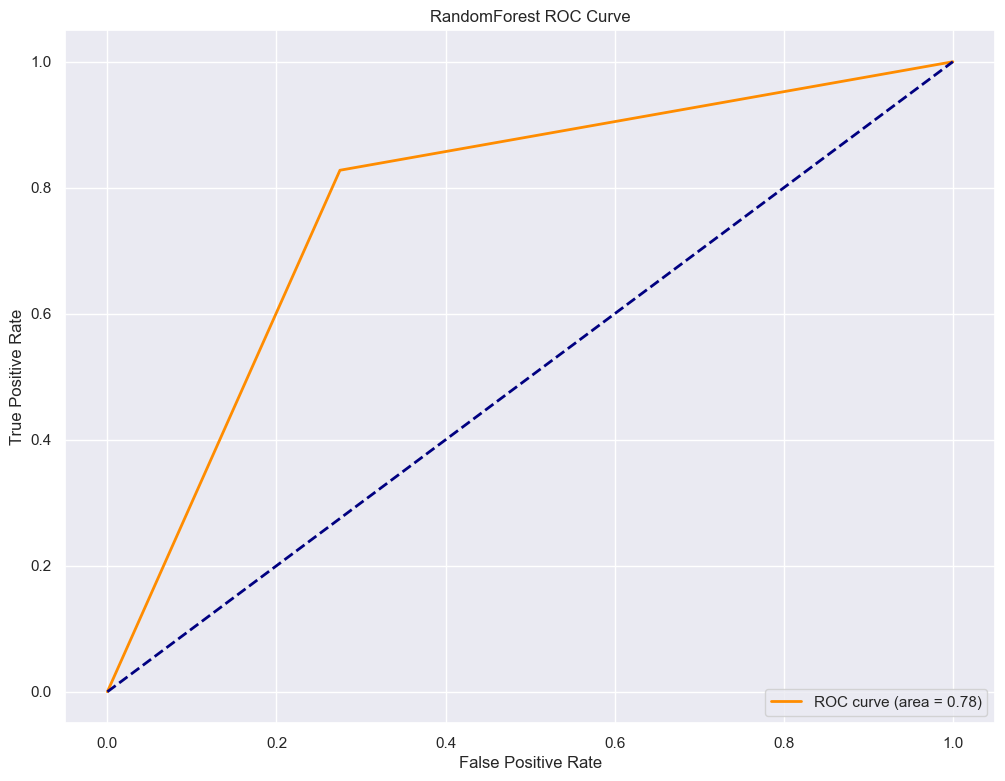

In [ ]:
#print(KNN_best)
#print(Random_forest_best)
rand = RandomForestClassifier(**studyRandom.best_params)
rand.fit(X_train,y_train)
pred = rand.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('RandomForest',fpr,tpr,auc_score)


              precision    recall  f1-score   support

           0       0.79      0.72      0.75      5955
           1       0.74      0.81      0.77      5992

    accuracy                           0.76     11947
   macro avg       0.77      0.76      0.76     11947
weighted avg       0.77      0.76      0.76     11947



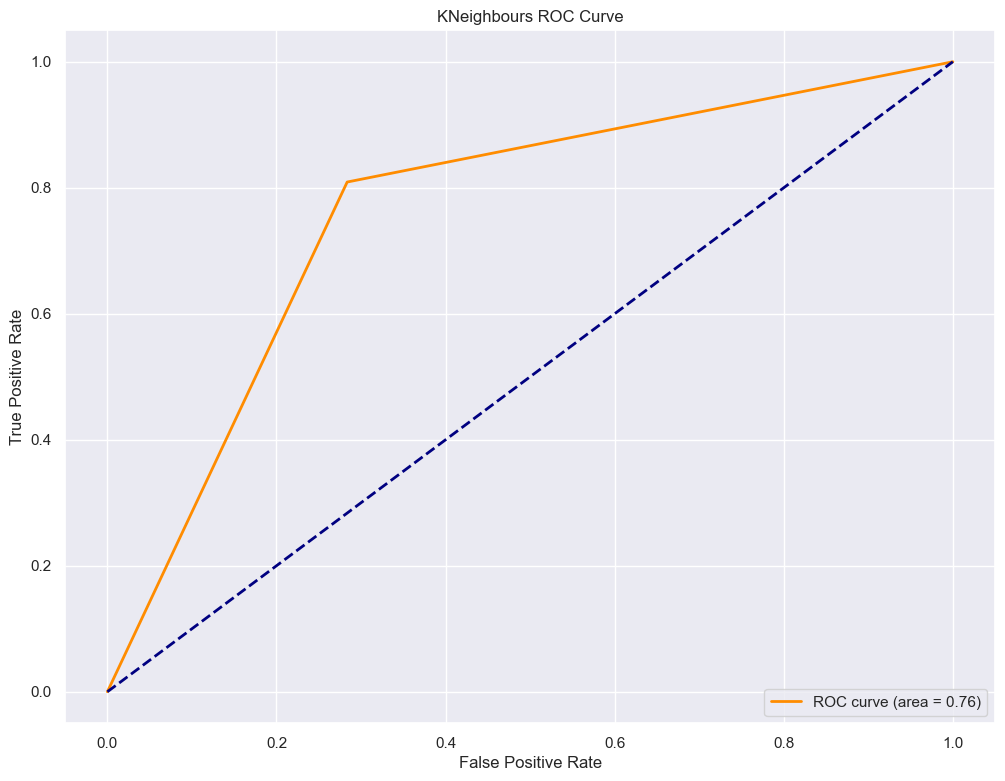

In [45]:
knn = KNeighborsClassifier(**studyKNN.best_params)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('KNeighbours',fpr,tpr,auc_score)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5955
           1       0.76      0.80      0.78      5992

    accuracy                           0.78     11947
   macro avg       0.78      0.78      0.77     11947
weighted avg       0.78      0.78      0.77     11947



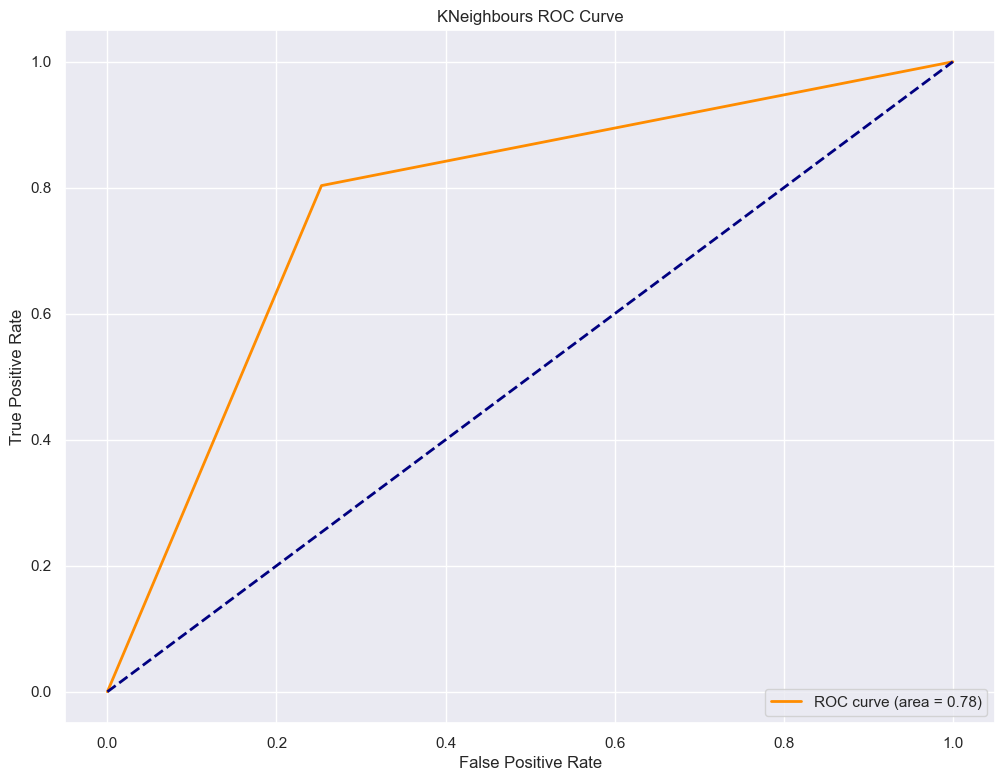

In [46]:
log = LogisticRegression(**studyLog.best_params)
log.fit(X_train,y_train)
pred = log.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('KNeighbours',fpr,tpr,auc_score)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5955
           1       0.76      0.81      0.78      5992

    accuracy                           0.78     11947
   macro avg       0.78      0.78      0.78     11947
weighted avg       0.78      0.78      0.78     11947



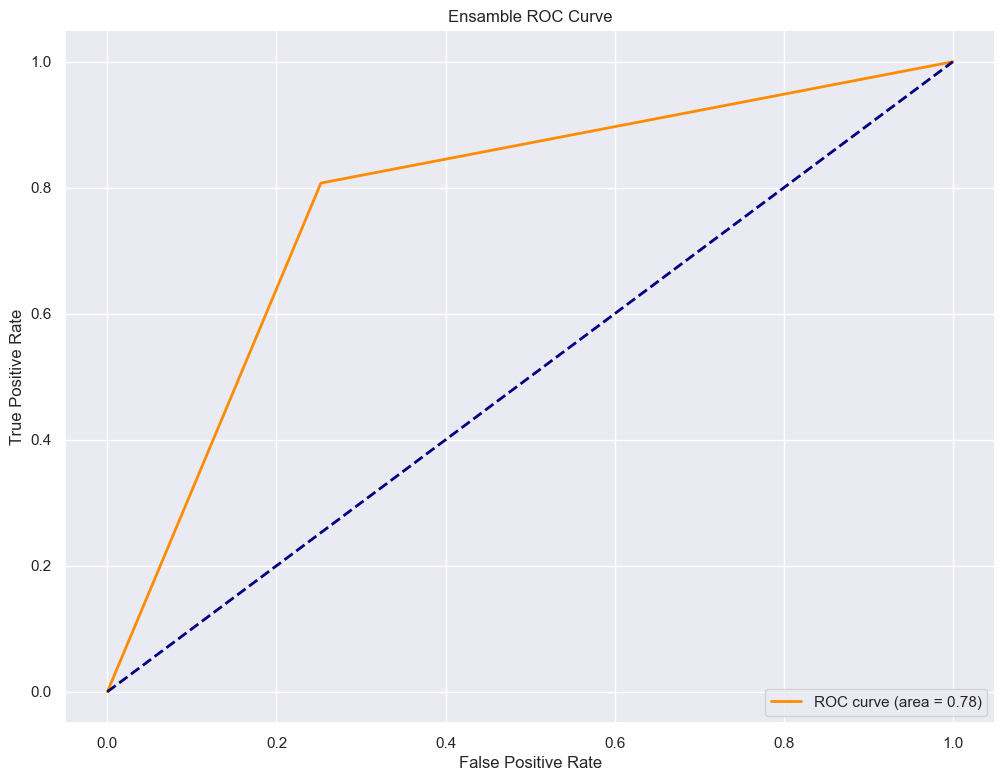

In [48]:
classifier_group =[
    ('rf',rand),
    ('knn',knn),
    ('log',log)
]
ensamble = StackingClassifier(estimators=classifier_group)
ensamble.fit(X_train,y_train)
pred = ensamble.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('Ensamble',fpr,tpr,auc_score)